In [ ]:
# np.float64(12.8005419697) Max 25.821795392 - Ours Maxschedwait - 25.022413184 - SchedWait - np.float64(12.010353471910001)
# np.float64(24.687497421440003) Max 25.645494784 - Original Maxschedwait - 24.855541952 - SchedWait - np.float64(23.900324480590008)

In [61]:
import pandas as pd

def get_stats(filename):
    def get_seconds_float(x):
        if x[-2] == 'm':
            return float(x[:-2])/1000.
        if x[-2] == 'µ':
            return float(x[:-2])/1000000.
        return float(x[:-1])
    df = pd.read_csv(filename, sep="\t")
    df['Sched wait time'] = df['Sched wait time'].apply(get_seconds_float)
    df['Total'] = df['Total'].apply(get_seconds_float)

    print(f"Total Time: {df['Total'].sum()}")

    print(f"Max Sched Wait Time: {max(df['Sched wait time'])}")
    print(f"Max Total Wait Time: {max(df['Total'])}")

    print(f"Avg Sched Wait Time: {df['Sched wait time'].mean()}")
    print(f"Avg Total Wait Time: {df['Total'].mean()}")

        
    

Original 4 GoMax Procs

In [62]:
get_stats("/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/Original_4_long_short/original_4_long.txt")

Total Time: 2468.7497421440003
Max Sched Wait Time: 24.855541952
Max Total Wait Time: 25.645494784
Avg Sched Wait Time: 23.900324480590008
Avg Total Wait Time: 24.687497421440003


In [63]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/Original_4_long_short/original_4_short.txt')

Total Time: 39080.995726964
Max Sched Wait Time: 4.706601252
Max Total Wait Time: 4.70700256
Avg Sched Wait Time: 1.3019198302526667
Avg Total Wait Time: 1.3026998575654667


With Swap

In [64]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/Swap_4_long_short/Swap_4_long.txt')

Total Time: 1280.0544588799999
Max Sched Wait Time: 25.022413184
Max Total Wait Time: 25.821795392
Avg Sched Wait Time: 12.010353471910001
Avg Total Wait Time: 12.8005445888


In [65]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/Swap_4_long_short/Swap_4_short.txt')

Total Time: 521205.970618893
Max Sched Wait Time: 25.318533504
Max Total Wait Time: 25.319347968
Avg Sched Wait Time: 17.372743458222835
Avg Total Wait Time: 17.3735323539631


With Phase Seperation

In [67]:
# With Phase Separation - Long Go Routines
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/phase_separation/phase_long.txt')

Total Time: 1409.559318113
Max Sched Wait Time: 14.90182336
Max Total Wait Time: 14.980911297
Avg Sched Wait Time: 13.651570900630002
Avg Total Wait Time: 14.09559318113


In [68]:
# With Phase Separation - Short Go Routines
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/phase_separation/phase_short.txt')


Total Time: 133755.55737352002
Max Sched Wait Time: 8.42651328
Max Total Wait Time: 8.427096064
Avg Sched Wait Time: 4.458016415019166
Avg Total Wait Time: 4.458518579117334


With Dynamic Preemption

In [69]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/Preempt_4_long/preempt_4_long.txt')

Total Time: 1128.25893818
Max Sched Wait Time: 23.039109313
Max Total Wait Time: 23.214947778
Avg Sched Wait Time: 10.899704645069999
Avg Total Wait Time: 11.282589381800001


In [70]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/Preempt_4_long/preempt_4_short.txt')

Total Time: 113447.587617832
Max Sched Wait Time: 7.570719333
Max Total Wait Time: 7.571047296
Avg Sched Wait Time: 3.781205080210167
Avg Total Wait Time: 3.7815862539277334


Original Long > Short

In [72]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/Original_4_long_short/original_4_long_gt_short.txt')

ValueError: could not convert string to float: '1m6.448619392'

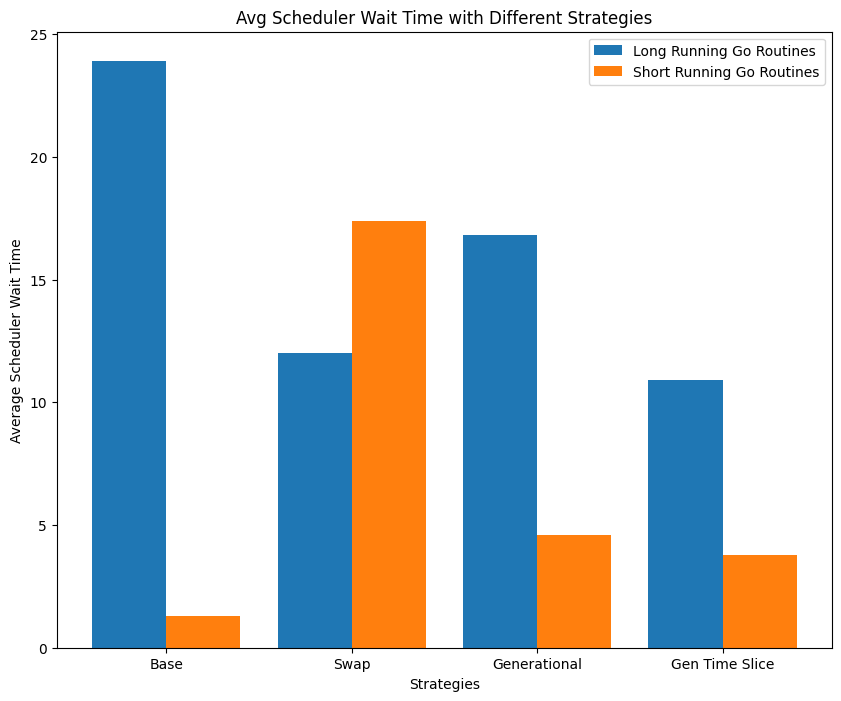

In [84]:
import numpy as np 
import matplotlib.pyplot as plt 

X = ['Base','Swap','Generational','Gen Time Slice'] 
Ygirls = [23.900324480590008,12.010353471910001,16.79794374882,10.899704645069999] 
Zboys = [1.3019198302526667,17.372743458222835,4.608403215191501, 3.781205080210167] 

X_axis = np.arange(len(X)) 
plt.figure(figsize=(10, 8))

plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Long Running Go Routines') 
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Short Running Go Routines') 

plt.xticks(X_axis, X) 
plt.xlabel("Strategies") 
plt.ylabel("Average Scheduler Wait Time") 
plt.title("Avg Scheduler Wait Time with Different Strategies") 
plt.legend() 
plt.show() 


In [82]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/phase_separation/phase_sep_4.txt')

Total Time: 1738.6075402239999
Max Sched Wait Time: 18.771689599
Max Total Wait Time: 19.363688192
Avg Sched Wait Time: 16.79794374882
Avg Total Wait Time: 17.38607540224


In [83]:
get_stats('/Users/vamsi/Documents/GitHub/go/schedtrace/trace_output/phase_separation/phase_sep_short.txt')

Total Time: 138269.353099822
Max Sched Wait Time: 9.633505984
Max Total Wait Time: 9.634325952
Avg Sched Wait Time: 4.608403215191501
Avg Total Wait Time: 4.608978436660734
